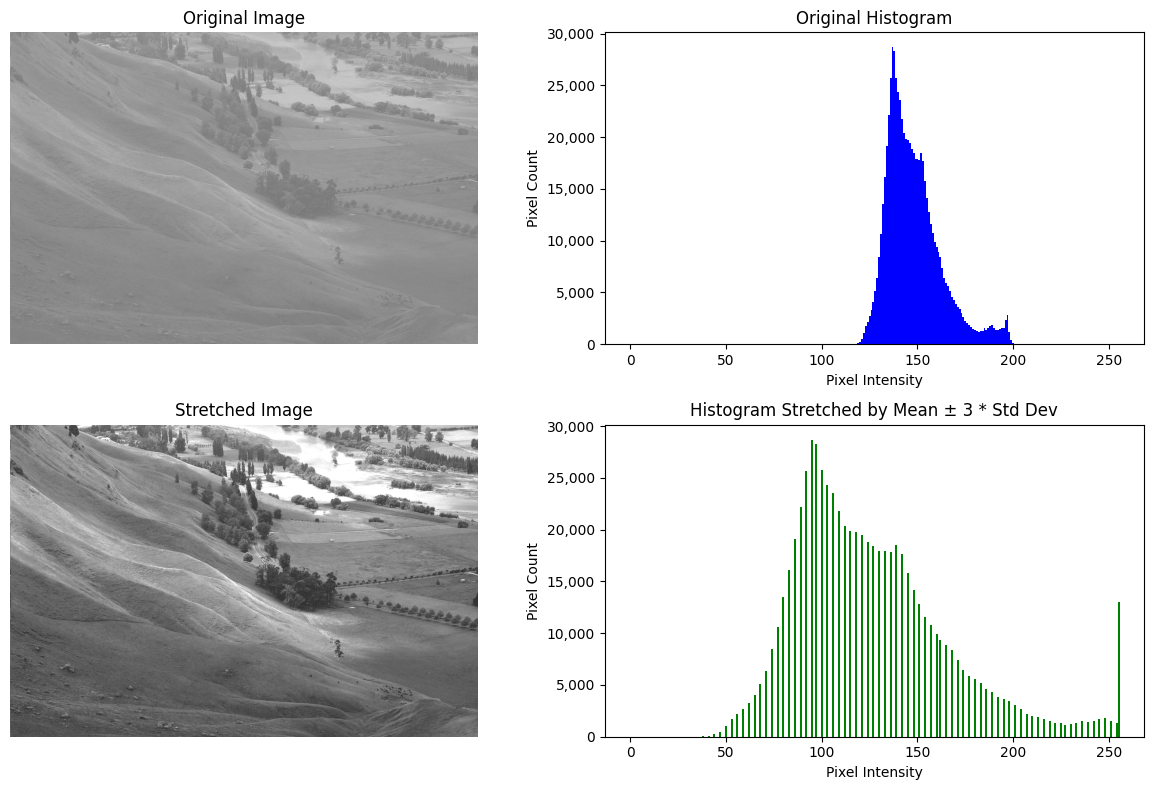

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 이미지 읽기 (흑백 모드)
gray_img = cv2.imread("histogram_example.jpg", cv2.IMREAD_GRAYSCALE)

# 평균과 표준 편차 계산
mean_val = np.mean(gray_img)
std_dev = np.std(gray_img)

# 표준 편차의 세 배 범위
lower_bound = mean_val - 3 * std_dev
upper_bound = mean_val + 3 * std_dev

# 스트레칭 적용: 범위 내의 픽셀 값만 스트레칭하고 그 외는 0 또는 255로 설정
stretched_img = np.clip(gray_img, lower_bound, upper_bound)
stretched_img = ((stretched_img - lower_bound) / (upper_bound - lower_bound) * 255).astype(np.uint8)

# 원본 히스토그램 계산
original_hist = np.histogram(gray_img, bins=256, range=(0, 256))[0]

# 스트레칭 후 히스토그램 계산
stretched_hist = np.histogram(stretched_img, bins=256, range=(0, 256))[0]

# 결과 비교 시각화
rows, cols = 2, 2
chart_idx = 0
plt.figure(figsize=(12, 8))

# 원본 이미지
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Original Image")
plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

# 원본 히스토그램
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Original Histogram")
plt.bar(range(256), original_hist, color="blue", width=1)
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
# y축 tick 포매팅
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))

# 스트레칭된 이미지
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Stretched Image")
plt.imshow(stretched_img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

# 스트레칭 후 히스토그램
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.title("Histogram Stretched by Mean ± 3 * Std Dev")
plt.bar(range(256), stretched_hist, color="green", width=1)
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
# y축 tick 포매팅
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))

plt.tight_layout()
plt.show()